<a href="https://colab.research.google.com/github/yarusx/cat_vs_dogo/blob/main/cat_vs_dog_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras
!pip install pyyaml h5py 

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 90% training, 10% validation
(raw_train, raw_validation), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteI6GH9V/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32)
  image = image/255.0
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  
  return image, label

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
prediction_layer = keras.layers.Dense(1, activation='sigmoid')

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
##If I need to download h5
#from google.colab import files
#files.download("dogs_vs_cats.h5")

model = tf.keras.models.load_model('/content/drive/MyDrive/dogs_vs_cats.h5')
#model = tf.keras.models.load_model("dogs_vs_cats.h5")

NameError: ignored

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=base_learning_rate, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

initial_epochs = 5

# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)
model.save("dogs_vs_cats.h5")




Epoch 1/5
655/655 [==============================] - 54s 82ms/step - loss: 0.0471 - accuracy: 0.9829 - val_loss: 0.0577 - val_accuracy: 0.9794
Epoch 2/5
655/655 [==============================] - 53s 80ms/step - loss: 0.0462 - accuracy: 0.9837 - val_loss: 0.0575 - val_accuracy: 0.9798
Epoch 3/5
655/655 [==============================] - 53s 80ms/step - loss: 0.0454 - accuracy: 0.9843 - val_loss: 0.0575 - val_accuracy: 0.9802
Epoch 4/5
655/655 [==============================] - 53s 80ms/step - loss: 0.0446 - accuracy: 0.9847 - val_loss: 0.0593 - val_accuracy: 0.9776
Epoch 5/5
655/655 [==============================] - 52s 79ms/step - loss: 0.0440 - accuracy: 0.9847 - val_loss: 0.0563 - val_accuracy: 0.9811
[0.9829002618789673, 0.9837122559547424, 0.9843332171440125, 0.9846675395965576, 0.9846675395965576]


In [ ]:
from google.colab import files
files.download("dogs_vs_cats.h5")

FileNotFoundError: ignored

In [1]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras
#!pip install pyyaml h5py 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model = tf.keras.models.load_model('/content/drive/MyDrive/dogs_vs_cats.h5')

In [ ]:
def TFconverter(self, feature_model):
  converter = tf.lite.TFLiteConverter.from_keras_model(feature_model)
  converter.allow_custom_ops = True
  converter.experimental_new_converter = True
  converter.target_spec.supported_ops = [
                                        tf.lite.OpsSet.TFLITE_BUILTINS,
                                        tf.lite.OpsSet.SELECT_TF_OPS
                                        ]
  converter.optimizations = [tf.lite.Optimize.DEFAULT]
  tflite_model = converter.convert()

  model_converter_file = pathlib.Path(self.model_converter)
  model_converter_file.write_bytes(tflite_model)
  

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.allow_custom_ops = True
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [
                                        tf.lite.OpsSet.TFLITE_BUILTINS,
                                        tf.lite.OpsSet.SELECT_TF_OPS
                                        ]
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()



In [ ]:
open("cats_dogs.tflite", "wb").write(tflite_model)

2315360

In [ ]:
from google.colab import files
files.download("cats_dogs.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file('/content/drive/MyDrive/dogs_vs_cats.h5')
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("linear.tflite", "wb").write(tflite_model)

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(160, 160))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 160, 160, 3)
	# center pixel data
	img = img.astype('float32')
	img = img/255.0
	return img

img = load_image('/content/drive/MyDrive/dog6.png')


In [ ]:
def predict(img):
  predictions = model.predict(img)

  if np.round_(predictions) == 0:
    return "Кіт"
  else:
    return "Пес"

Text(0.5, 1.0, 'Пес')

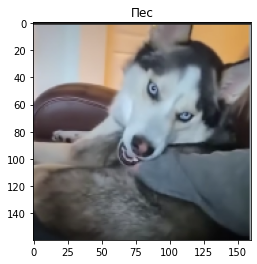

In [ ]:
prediction = predict(img)
plt.figure()
plt.imshow(img[0])
plt.title(prediction)


In [ ]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

NameError: ignored